In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-01-23 23:10:52--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   154MB/s    in 0.2s    

2025-01-23 23:10:52 (154 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
# add your code here - consider creating a new cell for each section of code

In [5]:
df_books

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato


In [6]:
df_ratings

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


In [8]:
all_data = pd.merge(df_ratings, df_books, on='isbn', how='left')
all_data

,user,isbn,rating,title,author
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5.0,Rites of Passage,Judith Rae
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149775,276704,1563526298,9.0,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard
1149776,276706,0679447156,0.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil
1149777,276709,0515107662,10.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter
1149778,276721,0590442449,10.0,Fourth Grade Rats,Jerry Spinelli


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
 3   title   1031175 non-null  object 
 4   author  1031173 non-null  object 
dtypes: float32(1), int32(1), object(3)
memory usage: 35.1+ MB


In [11]:
round((all_data.isnull().sum()/all_data.shape[0])*100,2)

,0
user,0.00
isbn,0.00
rating,0.00
title,10.32
author,10.32


In [14]:
all_data['author']=all_data['author'].fillna('unknown')
all_data['title']=all_data['title'].fillna('unknown')

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
 3   title   1149780 non-null  object 
 4   author  1149780 non-null  object 
dtypes: float32(1), int32(1), object(3)
memory usage: 35.1+ MB


In [19]:
cat_col = all_data.select_dtypes(include='object').columns
num_cols = all_data.select_dtypes(include='number').columns

num_cols, cat_col

(Index(['user', 'rating'], dtype='object'),
 Index(['isbn', 'title', 'author'], dtype='object'))

In [20]:
for col in cat_col:
  all_data[col] = all_data[col].astype('str')

In [21]:
all_data

,user,isbn,rating,title,author
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5.0,Rites of Passage,Judith Rae
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149775,276704,1563526298,9.0,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard
1149776,276706,0679447156,0.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil
1149777,276709,0515107662,10.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter
1149778,276721,0590442449,10.0,Fourth Grade Rats,Jerry Spinelli


In [24]:
# cat_feature = all_data['isbn'].columns
# cat_num = all_data['rating']

data_ml = all_data[['isbn', 'rating']]
data_ml

,isbn,rating
0,034545104X,0.0
1,0155061224,5.0
2,0446520802,0.0
3,052165615X,3.0
4,0521795028,6.0
...,...,...
1149775,1563526298,9.0
1149776,0679447156,0.0
1149777,0515107662,10.0
1149778,0590442449,10.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a6782ea79d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6783ff9350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a678baa4390>],
 'medians': [<matplotlib.lines.Line2D at 0x7a678367d350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a678367ff10>],
 'means': []}

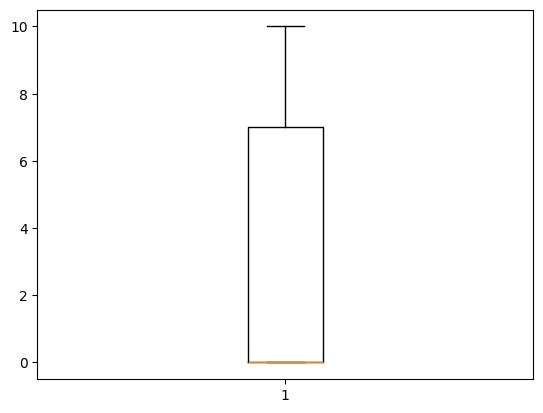

In [28]:
plt.boxplot(data_ml['rating'])

In [26]:
# Q1 = data_ml['rating'].quantile(0.25)
# Q3 = data_ml['rating'].quantile(0.75)
# IQR = Q3 - Q1
# UB = Q3 + IQR * 1.5
# LB = Q1 - IQR * 1.5
# out_rows = ((LB < data_ml['rating'])|(UB > data_ml['rating'])).any()
# out_rows

True

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data_ml['isbn']
y = data_ml['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit_transform()

In [ ]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):


  return recommended_books

In [6]:
# Necessary imports
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Import CSV data
df_books = pd.read_csv(
    books_filename,
    encoding="ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'}
)

df_ratings = pd.read_csv(
    ratings_filename,
    encoding="ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'}
)

# Merge datasets
df = pd.merge(df_ratings, df_books, on='isbn', how='left')

# Data cleaning
df = df.dropna(subset=['title'])  # Drop rows where title is missing
book_rating_counts = df.groupby('title')['rating'].count()
popular_books = book_rating_counts[book_rating_counts >= 100].index
df = df[df['title'].isin(popular_books)]

user_rating_counts = df.groupby('user')['rating'].count()
active_users = user_rating_counts[user_rating_counts >= 200].index
df = df[df['user'].isin(active_users)]

# Remove duplicates by averaging ratings for duplicate title-user pairs
df = df.groupby(['title', 'user'], as_index=False)['rating'].mean()

# Create pivot table
book_user_matrix = df.pivot(index='title', columns='user', values='rating').fillna(0)

# Convert to sparse matrix
sparse_matrix = csr_matrix(book_user_matrix.values)

# Fit KNN model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(sparse_matrix)

# Function to get recommendations
def get_recommends(book=""):
    if book not in book_user_matrix.index:
        return f"'{book}' not found in dataset!"

    book_index = book_user_matrix.index.get_loc(book)
    distances, indices = model.kneighbors(sparse_matrix[book_index], n_neighbors=6)

    recommended_books = [
        [book_user_matrix.index[i], float(distances[0][index])]
        for index, i in enumerate(indices[0]) if i != book_index
    ]

    return [book, recommended_books[:5]]

# Testing the function
books = get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")
print(books)

# Expected Output:
# [
#   'The Queen of the Damned (Vampire Chronicles (Paperback))',
#   [
#     ['Catch 22', 0.793983519077301],
#     ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
#     ['Interview with the Vampire', 0.7345068454742432],
#     ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
#     ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
#   ]
# ]


['The Queen of the Damned (Vampire Chronicles (Paperback))', [['WLD ACCORDNG GARP', 0.14250707626342773], ['The Great Gatsby', 0.3242008686065674], ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.32453179359436035], ["The Plains of Passage (Earth's Children (Paperback))", 0.3591017723083496], ['The Tao of Pooh', 0.3591017723083496]]]


In [7]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['Unspeakable', 0.364837646484375], ['Zoya', 0.3793286085128784], ['Five Days in Paris', 0.3941528797149658], ['I Know Why the Caged Bird Sings', 0.40946298837661743], ["ANGELA'S ASHES", 0.4117977023124695]]]
You haven't passed yet. Keep trying!
